In [178]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.1.0'

# Data (preparing and loading)

In [179]:
# create "known" parameters
weight = 0.7
bias = 0.3
# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Split data into training and test sets

In [180]:
# create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [181]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Prediction")
    plt.legend(prop={"size": 14})

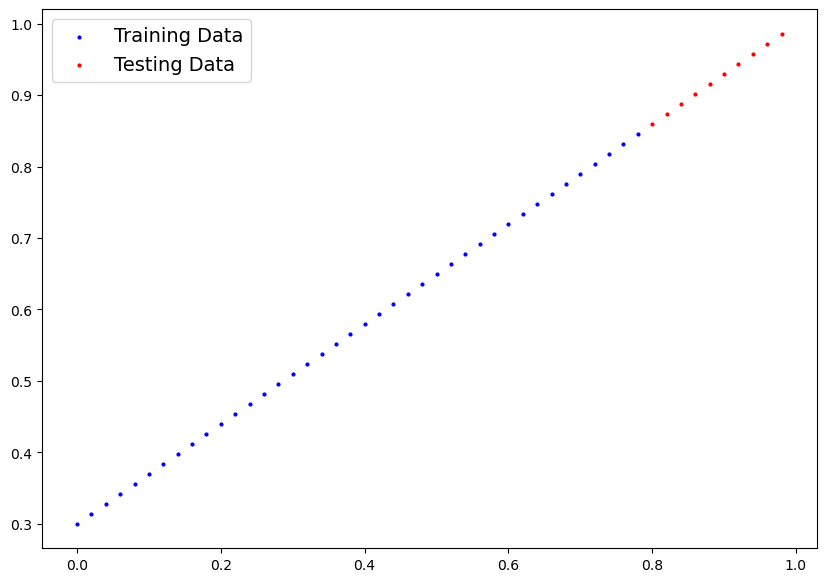

In [182]:
plot_predictions()

## Build model

In [183]:
class LinearRgression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


## Checking the contents of a pytorch model 

In [184]:
torch.manual_seed(42)
model_0 = LinearRgression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [185]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using torch.inference_mode()

In [186]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [187]:
print(f"Testing sample: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Prediction's values: \n{y_preds}")

Testing sample: 10
Number of predictions made: 10
Prediction's values: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


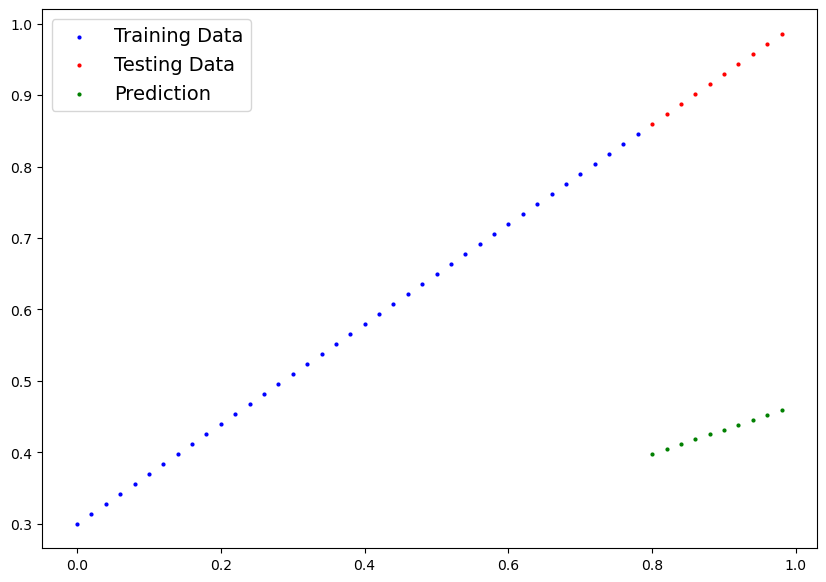

In [188]:
plot_predictions(predictions=y_preds)

# Train model 

## Creating a loss function and optimizer in pytorch 

In [189]:
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [190]:
torch.manual_seed(42)

# set the number of epochs
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ## Training loop
    # Put model in training mode
    model_0.train()
    
    # 1. Forward pass on train data 
    y_pred = model_0(X_train)
    # 2. Loss
    loss = loss_fn(y_train, y_pred)
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    # 4. Loss Backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()
    
    ## Testing loop
    # Put the model in evaluation mode 
    model_0.eval()
    # 1. Forward pass on the test data
    test_pred = model_0(X_test)
    # 2. Calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    # 3. Print
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test loss:

In [191]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

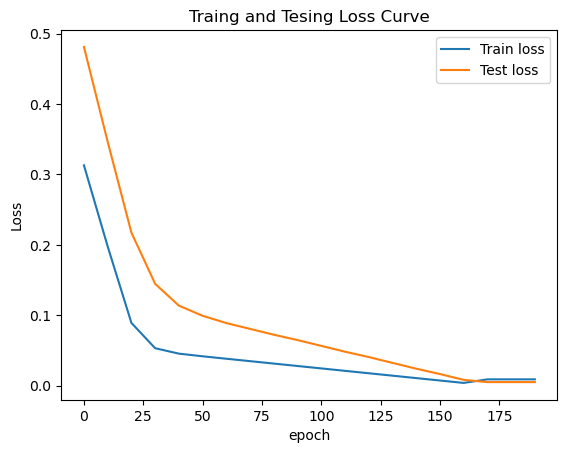

In [192]:
# plot the loss curve
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Traing and Tesing Loss Curve")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()

In [193]:
train_loss_values

[array(0.31288138, dtype=float32),
 array(0.19767132, dtype=float32),
 array(0.08908726, dtype=float32),
 array(0.05314853, dtype=float32),
 array(0.04543797, dtype=float32),
 array(0.04167863, dtype=float32),
 array(0.03818933, dtype=float32),
 array(0.0347609, dtype=float32),
 array(0.03132383, dtype=float32),
 array(0.0278874, dtype=float32),
 array(0.02445896, dtype=float32),
 array(0.02102021, dtype=float32),
 array(0.01758547, dtype=float32),
 array(0.01415539, dtype=float32),
 array(0.01071659, dtype=float32),
 array(0.00728353, dtype=float32),
 array(0.00385178, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32)]

In [194]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making predictions with a trained PyTorch model (inference)

In [195]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

In [196]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

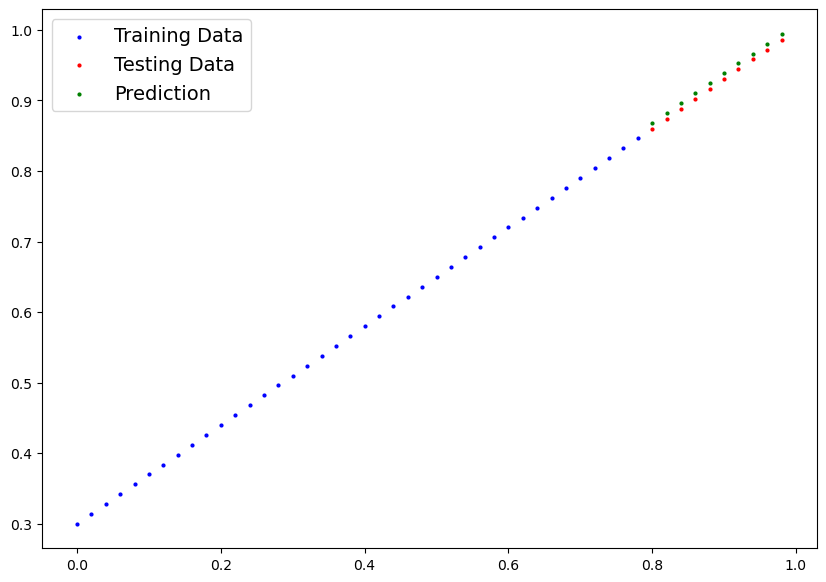

In [197]:
plot_predictions(predictions=y_preds)

## Saving a PyTorch model's state_dict()

In [198]:
from pathlib import Path

# 1. create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


## Loading a saved PyTorch model's state_dict()

In [199]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRgression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [200]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [201]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [202]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0'

In [203]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### Data

In [204]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [205]:
# Split data 
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

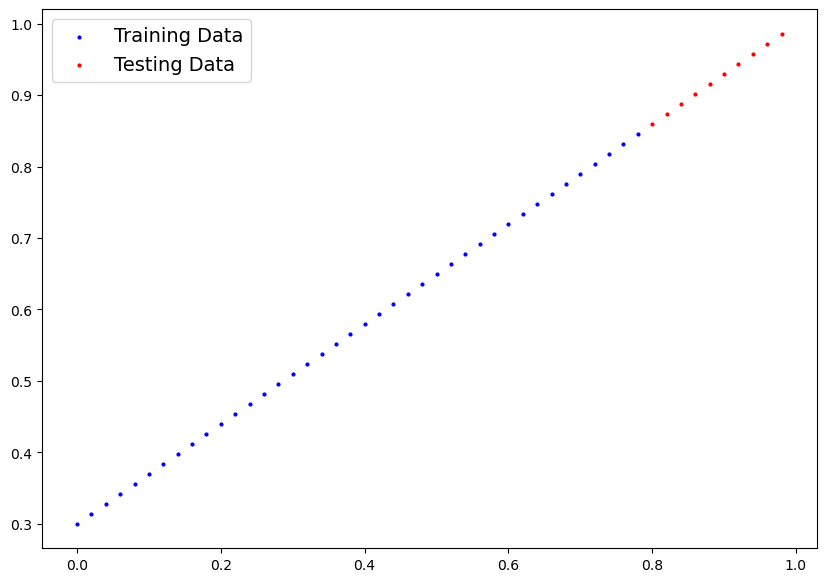

In [206]:
plot_predictions(X_train, y_train, X_test, y_test)

### Building a Pytorch linear model

In [207]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Initialize model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [208]:
next(model_1.parameters()).device

device(type='cpu')

### Training 

In [209]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [210]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    ### training
    model_1.train()
    
    y_pred = model_1(X_train)
    
    loss = loss_fn(y_train, y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    ### testing
    
    model_1.eval()
    
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(y_test, test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Training loss: {loss} | Testing loss: {test_loss}")

Epoch 0 | Training loss: 0.5551779866218567 | Testing loss: 0.4527372419834137
Epoch 10 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 20 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 30 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 40 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 50 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 60 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 70 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 80 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 90 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 100 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 110 | Training loss: 0.05761389806866646 | Testing loss: 0.11862673610448837
Epoch 120 | Train

OrderedDict([('linear_layer.weight', tensor([[0.6169]])),
             ('linear_layer.bias', tensor([0.3900]))])

### Making predictions

In [212]:
model_1.eval()

with torch.inference_mode():
    test_preds = model_1(X_test)
    
test_preds

tensor([[0.8836],
        [0.8959],
        [0.9082],
        [0.9206],
        [0.9329],
        [0.9453],
        [0.9576],
        [0.9699],
        [0.9823],
        [0.9946]])

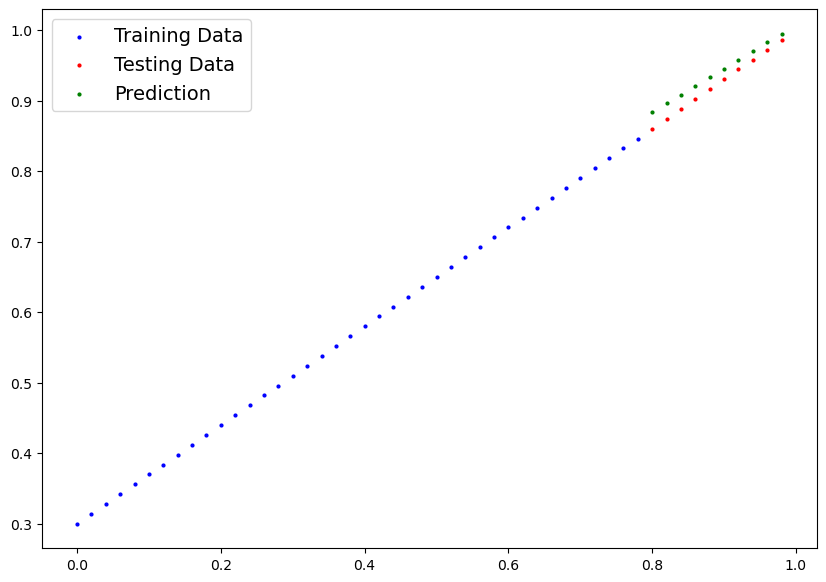

In [213]:
plot_predictions(predictions=test_preds.cpu())

### Saving and loading model

In [214]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [215]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [216]:
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [220]:
loaded_model_1.eval()

with torch.inference_mode():
    loaded_pred = loaded_model_1(X_test)
test_preds == loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])